<a href="https://colab.research.google.com/github/francoquintanilla0/ConcentracionIA/blob/Modulo2/Modelo_RegLin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive") 

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
%cd '/content/gdrive/MyDrive/Colab Notebooks/Documentos IA'
!ls

/content/gdrive/MyDrive/Colab Notebooks/Documentos IA
advertising.csv  iris.names		  titanic	  wine.data
iris.data	 Marriage_Divorce_DB.csv  Valhalla23.csv  wine.names


In [ ]:
# Importamos librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error as MSE

In [ ]:
# Importamos nuestro data frame
df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Documentos IA/advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [ ]:
# Contamos si hay datos NaNs
df.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [ ]:
# Vemos el tamaño de los datos para separar por train y test
df.shape

(200, 4)

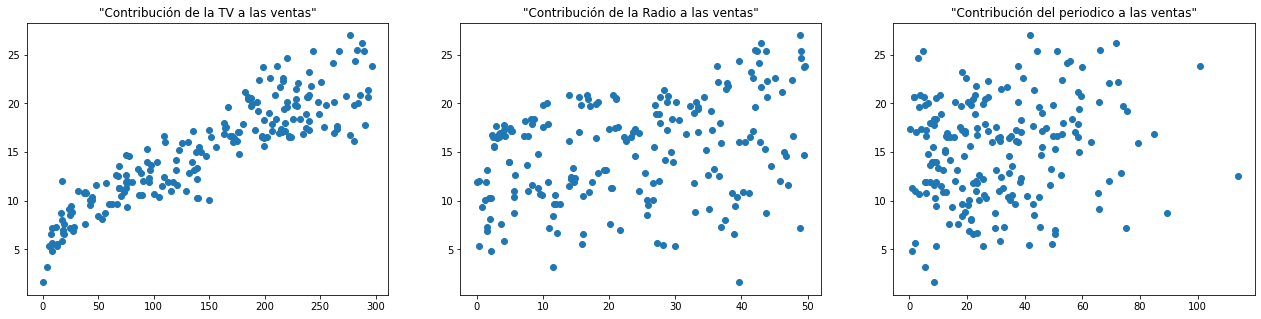

In [ ]:
# Visualizamos nuestras variables para poder hacer un mejor analisis dobre la regresión
fig, ax = plt.subplots(1, 3, figsize=(22,5))

ax[0].scatter(df['TV'], df['Sales'])
ax[0].set_title('"Contribución de la TV a las ventas"')

ax[1].scatter(df['Radio'], df['Sales'])
ax[1].set_title('"Contribución de la Radio a las ventas"')

ax[2].scatter(df['Newspaper'], df['Sales'])
ax[2].set_title('"Contribución del periodico a las ventas"')

plt.show()

In [ ]:
# Vemos que la mejor opción sería irnos por la TV, por lo que
# dividimos nuestro data frame xs y nuestro goal (y) en est y train
x_train = df.iloc[0:160,0]
x_test = df.iloc[160:,0]

y_train = df.iloc[0:160,3]
y_test = df.iloc[160:,3]

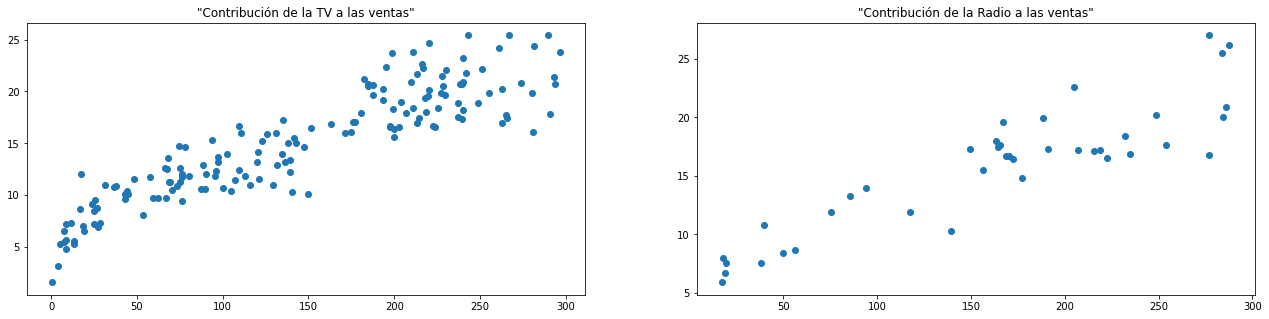

In [ ]:
# Vemos como quedarón las gráficas
fig, ax = plt.subplots(1, 2, figsize=(22,5))

ax[0].scatter(x_train, y_train)
ax[0].set_title('"Contribución de la TV a las ventas"')

ax[1].scatter(x_test, y_test)
ax[1].set_title('"Contribución de la Radio a las ventas"')

plt.show()

In [ ]:
# Hipótesis (entrenamiento y error)
h = lambda x, theta: theta[0] + theta[1]*x
j_i = lambda x, y, theta: (h(x, theta) - y)**2 

# Parametros
alpha = 0.0001
n = 100000
theta = [1, 1]

# Entrenamiento
for i in range(n):
  delta = []
  deltax = []

  for x_i, y_i in zip(x_train, y_train):
    delta.append(h(x_i, theta) - y_i)
    deltax.append((h(x_i, theta) - y_i)*x_i)

  # Thetas
  theta[0] = theta[0] - alpha/n*sum(delta)
  theta[1] = theta[1] - alpha/n*sum(deltax)

print(theta)

[1.0204888531896092, 0.08651680013656249]


In [ ]:
# Training
delta_train = []
for x_i, y_i in zip(x_train, y_train):
  delta_train.append(j_i(x_i, y_i, theta))  
 
J_train = 1/(2*n)*sum(delta_train)

# Validación
delta_test = []
for x_i, y_i in zip(x_test, y_test):
  delta_test.append(j_i(x_i, y_i, theta))  
 
J_test = 1/(2*n)*sum(delta_test)

print("Error en el train:", J_train)
print("Error en el test:", J_test)
print("Valores de las thetas", theta)

Error en el train: 0.011639279253998169
Error en el test: 0.002577764702755352
Valores de las thetas [1.0204888531896092, 0.08651680013656249]


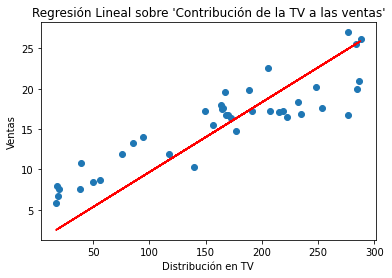

In [271]:
plt.scatter(x_test, y_test)
plt.plot(x_test, theta[0] + theta[1]*x_test, 'r')
plt.title("Regresión Lineal sobre 'Contribución de la TV a las ventas'")
plt.xlabel("Distribución en TV")
plt.ylabel("Ventas")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


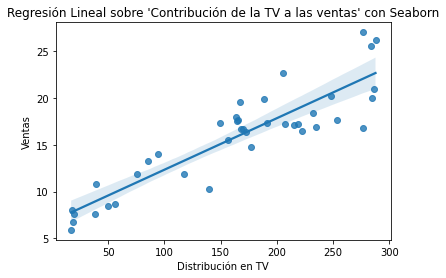

In [273]:
# Podemos comparar con seaborn a ver que tan parecidos estamos.
sns.regplot(x_test, y_test)
plt.title("Regresión Lineal sobre 'Contribución de la TV a las ventas' con Seaborn")
plt.xlabel("Distribución en TV")
plt.ylabel("Ventas")
plt.show()

Como podemos ver, vamos por buen camino de la regresión lineal de primer orden. Si tratamos de meter las variables de "Radio" y "Newspaper" el modelo empieza a tener errores demasiado grandes y el modelo ya no se ajusta correctamente.